# Proyecto I
## Formulación en coord cilindricas
### Caso Vacío

In [1]:
Atom = false
#Atom = true

false

In [2]:
using Gridap
using GridapODEs
if  Atom == false
    using GridapMakie, GLMakie
end
using FileIO
using GridapGmsh
using gmsh

In [3]:
Threads.nthreads()

7

In [4]:
#NO CORRER - LO DEJO POR LAS DUDAS
function make_model(p)
    gmsh.initialize()
    gmsh.option.setNumber("General.Terminal", 1)
    
        side_x, side_y, lc = p
        #first we build the rectangular boundary: 
        #gmsh.initialize()
        #gmsh.option.setNumber("General.Terminal", 1)
        gmsh.model.add("rectangle")
        #lc = 1e-2
        #lc = 1e-1
        lc_x = lc
        lc_y = lc*side_y/side_x
        gmsh.model.geo.addPoint(0, 0, 0,50, 1)
        gmsh.model.geo.addPoint(side_x, 0,  0, lc_x, 2)
        gmsh.model.geo.addPoint(side_x, side_y, 0, lc_y, 3)
        gmsh.model.geo.addPoint(0, side_y, 0, lc_y, 4)

        # make the square boundary
        gmsh.model.geo.addLine(1, 2, 1)
        gmsh.model.geo.addLine(2, 3, 2)
        gmsh.model.geo.addLine(3, 4, 3)
        gmsh.model.geo.addLine(4, 1, 4)

        gmsh.model.geo.addCurveLoop([1, 2, 3, 4], 10) #the rectangle
        gmsh.model.geo.synchronize()

        #gmsh.model.geo.addPhysicalGroup(1, [10], 11 )
        gmsh.model.geo.addPhysicalGroup(1, [1], 11 )
        gmsh.model.geo.addPhysicalGroup(1, [4], 14 )
        gmsh.model.geo.addPhysicalGroup(1, [2], 12 )
        gmsh.model.geo.addPhysicalGroup(1, [ 3], 13 )
        gmsh.model.setPhysicalName(1, 11, "centroz")
        gmsh.model.setPhysicalName(1, 14, "centrorho")
        gmsh.model.setPhysicalName(1, 12, "asintrho")
        gmsh.model.setPhysicalName(1, 13, "asintz")
        gmsh.model.geo.synchronize()

        # make the surface

        gmsh.model.geo.addPlaneSurface([10], 100) #the surface
        gmsh.model.geo.synchronize()

        gmsh.model.addPhysicalGroup(2, [100], 101)
        gmsh.model.setPhysicalName(2, 101, "surface")
        gmsh.model.geo.synchronize()

        gmsh.model.mesh.generate(2)
        gmsh.write("modelos/rectangle.msh")
        gmsh.finalize()
        model=GmshDiscreteModel("modelos/rectangle.msh")
 
    end

    return model

L = 1E6
displacement = 0.0
h = 10000
#10^(-1)
grid_type = "rectangle"
p = (L,L, h) #rectangle (Length_x, Length_y, h) 
#model = make_model(grid_type, p)
model = make_model( p)


include("modelos/mesh_generator.jl")


LoadError: UndefVarError: model not defined

In [4]:
model = GmshDiscreteModel("modelos/rectangle_NS.msh")
  #  rectangle_vacio.msh")

Info    : Reading 'modelos/rectangle_NS.msh'...
Info    : 9 entities
Info    : 64133 nodes
Info    : 128264 elements
Info    : Done reading 'modelos/rectangle_NS.msh'                          


UnstructuredDiscreteModel()

In [5]:
Ω = Triangulation(model)
degree = 3
dΩ = Measure(Ω,degree)

Measure()

In [6]:
writevtk(Ω,"square")

(["square.vtu"],)

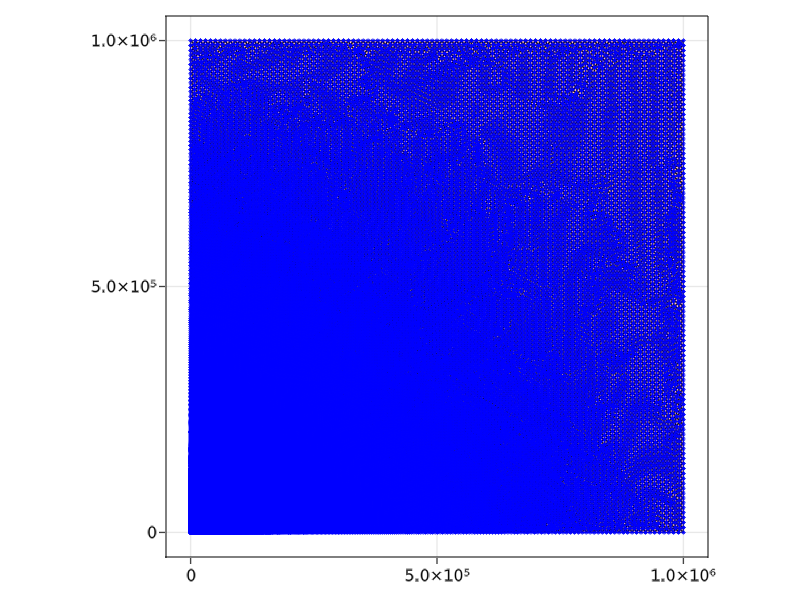

In [7]:
if Atom == false 
    fig, ax = plot(Ω)
    ax.aspect = AxisAspect(1) # this makes the region with fixed aspect, so it might not give the correct ratios
    wireframe!(Ω, color=:black, linewidth=1)
    scatter!(Ω, marker=:star8, markersize=4, color=:blue)
    fig
end 

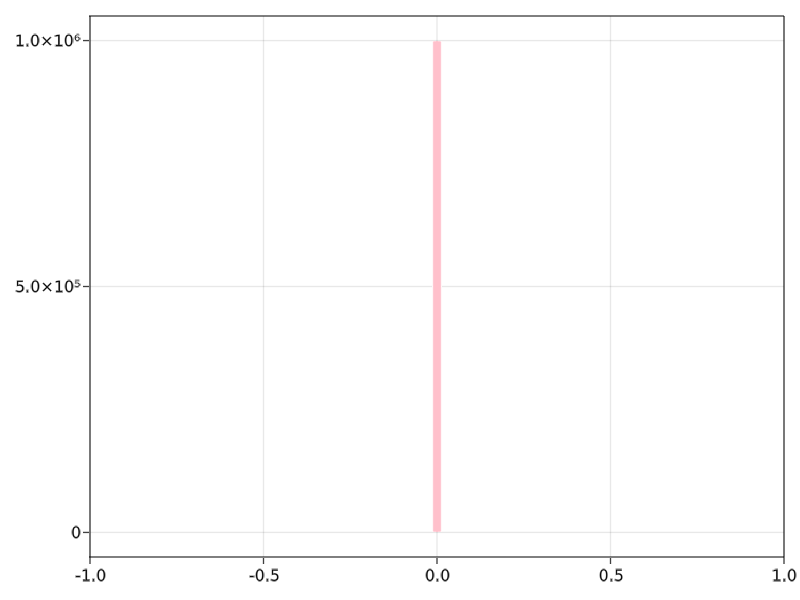

In [8]:
neumanntags_crho= ["centrorho"]
Γ_crho = BoundaryTriangulation(model,tags=neumanntags_crho)
dΓ_crho = Measure(Γ_crho,degree)
if Atom == false 
    fig = plot(Γ_crho, linewidth=8
    #, shading=true
    )
end

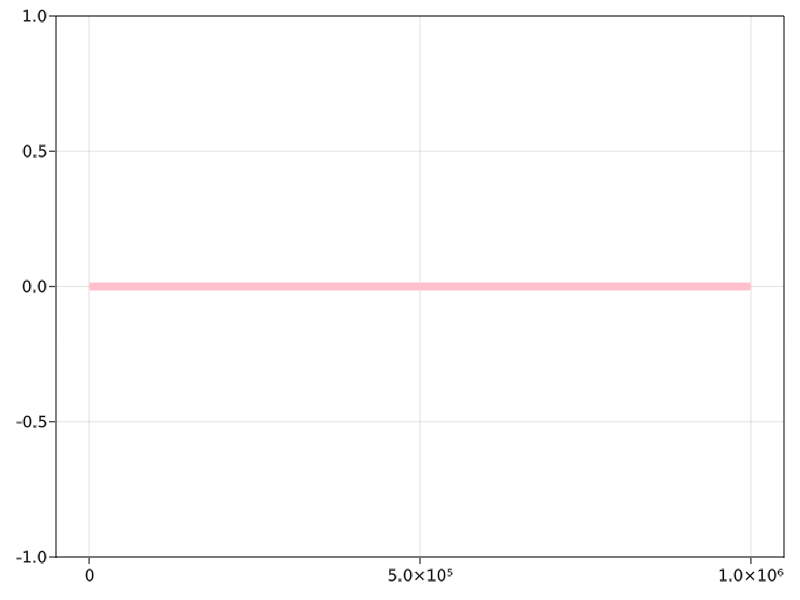

In [9]:
neumanntags_cz= [ "centroz"]
Γ_cz = BoundaryTriangulation(model,tags=neumanntags_cz)
dΓ_cz= Measure(Γ_cz,degree)
if Atom == false 
    fig = plot(Γ_cz, linewidth=8
    #, shading=true
      )
end

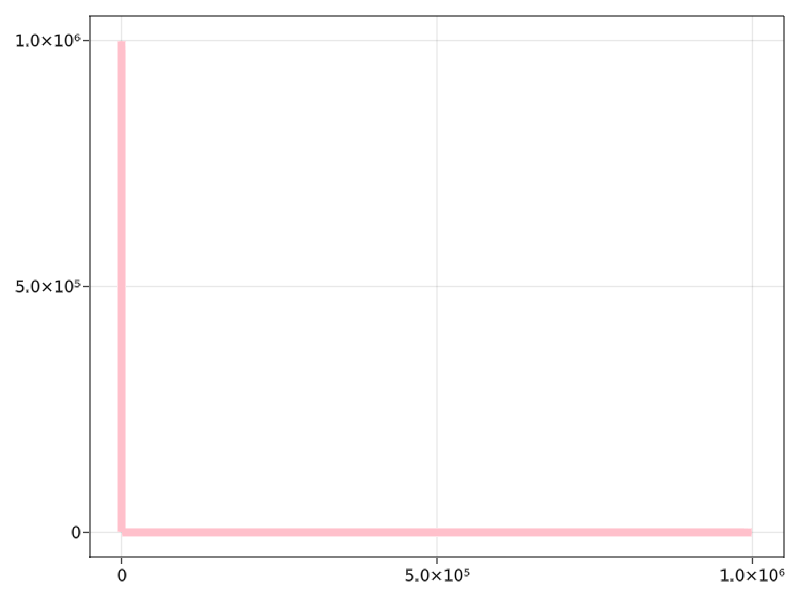

In [10]:
neumanntags_centro = [ "centroz", "centrorho"]
Γ_centro = BoundaryTriangulation(model,tags=neumanntags_centro)
dΓ_centro = Measure(Γ_centro,degree)
if Atom == false 
    fig = plot(Γ_centro, linewidth=8
    #, shading=true
    )
end

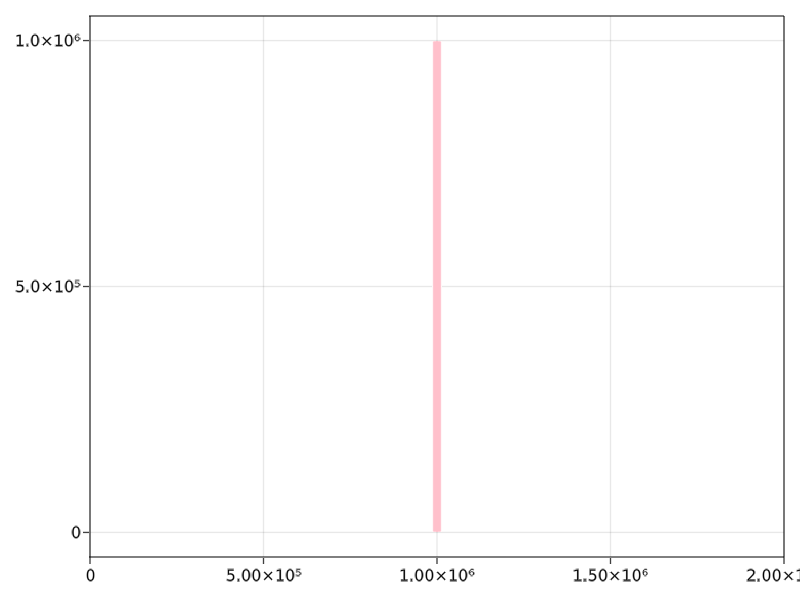

In [11]:
neumanntags_extrho = [ "asintrho"]
Γ_extrho = BoundaryTriangulation(model,tags=neumanntags_extrho)
dΓ_extrho = Measure(Γ_extrho,degree)
if Atom == false 
    fig = plot(Γ_extrho, linewidth=8
    #, shading=true
   )
end    

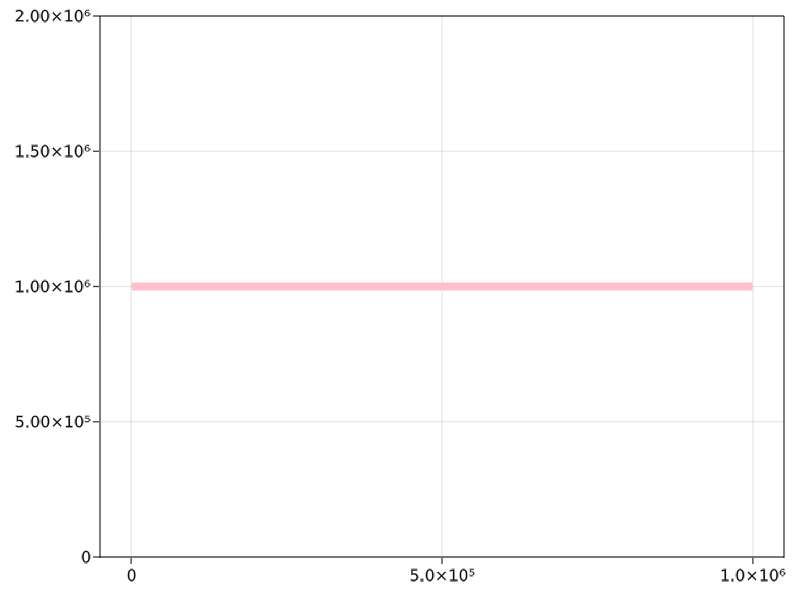

In [12]:
neumanntags_extz = [  "asintz" ]
Γ_extz = BoundaryTriangulation(model,tags=neumanntags_extz)
dΓ_extz = Measure(Γ_extz,degree)
if Atom == false 
    fig = plot(Γ_extz, linewidth=8
    #, shading=true
   )
end   

In [13]:
labels = get_face_labeling(model)

Gridap.Geometry.FaceLabeling:
 0-faces: 64133
 1-faces: 191130
 2-faces: 126998
 tags: 5
 entities: 108

In [14]:
add_tag_from_tags!(labels,"DIRI",["asintz", "asintrho"])

6-element Vector{String}:
 "centroz"
 "asintrho"
 "asintz"
 "centrorho"
 "surface"
 "DIRI"

In [15]:
add_tag_from_tags!(labels,"DIRIint",["centroz", "centrorho"])

7-element Vector{String}:
 "centroz"
 "asintrho"
 "asintz"
 "centrorho"
 "surface"
 "DIRI"
 "DIRIint"

In [44]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)
V = TestFESpace(model,reffe,conformity=:H1)
    #vector_type=Vector{Float64}
U = TrialFESpace(V)
VD = TestFESpace(model,reffe;conformity=:H1,dirichlet_tags=["DIRIint"#=, "DIRI" =#])


UnconstrainedFESpace()

In [17]:
vacio=true

true

In [18]:
# fuente, a tiene la info del objeto 
a0=6.0E-18
R=7.5E5
Z=7.3E5
s(x) = sqrt((x[1]/ R)^2 + (x[2]/Z)^2) 
q(x)=1. - s(x) ^4 * (1. - 5. *(s(x) -1.) + 15. * (s(x)-1.)^2 - 35. *(s(x) -1.)^3 +70. * (s(x)- 1.)^4)

if vacio == false
    function α(x)
        if abs(s(x))  < 1.
            return  q(x)*a0
        end
        if abs(s(x)) >= 1.
           return  0.
        end
    end
end

if vacio == true
    function α(x)
        return  0.
    end    
end

t(x) = 8*π*α(x)

#Cond de Newman borde centro
c(x)=0.


c (generic function with 1 method)

In [19]:
writevtk(Ω,"resultados/Proyecto1/VACIO/α",cellfields=["α"=>α])

(["resultados/Proyecto1/VACIO/α.vtu"],)

In [20]:
d(x) = VectorValue(2. ,0)
conv(l,∇t) = (∇t')⋅l

conv (generic function with 1 method)

In [21]:
ρ(x)=x[1]
ρvec(x) = VectorValue(1.,0)
zvec(x) = VectorValue(0,1.)
z(x)=x[2]

z (generic function with 1 method)

In [22]:
a(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho +   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz  
b(v) = ∫(-v * t* ρ) *dΩ + ∫( c * v *ρ ) *dΓ_centro

b (generic function with 1 method)

In [23]:
op = AffineFEOperator(a,b,U,V)

AffineFEOperator()

In [24]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [25]:
uh = solve(solver,op)

SingleFieldFEFunction():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 8726908641132930048

In [26]:
writevtk(Ω,"resultados/Proyecto1/VACIO/f",cellfields=["f"=>uh])
writevtk(Ω,"resultados/Proyecto1/VACIO/∇f",cellfields=["∇f"=>∇(uh)])

(["resultados/Proyecto1/VACIO/∇f.vtu"],)

In [27]:
invrho3(x)=3. / x[1]

invrho3 (generic function with 1 method)

In [28]:
f1=conv∘(ρvec,∇(uh))
f2=conv∘(zvec,∇(uh))
F=f2*f2 +f1*f1

OperationCellField():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 8726908641132930048

In [29]:
writevtk(Ω,"resultados/Proyecto1/VACIO/residualf",cellfields=["res"=>Δ(uh)+invrho3 *f1+t])

(["resultados/Proyecto1/VACIO/residualf.vtu"],)

### Factor conforme

In [30]:
function t1(x)
  return 2. * π*α(x)
end

function t2(x)
  return 6. * π*α(x)
end

t2 (generic function with 1 method)

In [31]:
res(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz+ ∫( c * w2 *ρ )  *dΓ_cz + ∫( c * w2 *ρ)  *dΓ_crho

res (generic function with 1 method)

In [32]:
jac(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ +∫( -w2 *( (dw- 1.) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho +   ∫( -w2 *( (dw -1. )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz 

jac (generic function with 1 method)

In [33]:
ϵ=0.000001
ueD(x)=1. + 1. /( (x[1]^2 + x[2]^2 +ϵ)^(1/2))

ueD (generic function with 1 method)

In [45]:
UD = TrialFESpace(VD,[ueD #=,ueD=# ])

TrialFESpace()

In [46]:
oppsi = FEOperator(res,jac,UD,VD)

FEOperatorFromWeakForm()

In [51]:
using LineSearches: BackTracking
nls = NLSolver(
  show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-20, xtol= 1E-20, iterations=50)
solver = FESolver(nls)

NonlinearFESolver()

In [52]:
xcte(x) =1. # expresion
#w02=interpolate_everywhere(xcte,UD)
M=2.71E5
ue(x)=1. + 1/( (x[1]^2 + x[2]^2)^(1/2)+ϵ)#=)*(1+M*exp( -(x[1]^2 + x[2]^2)^2/(5E5)^4 ))=#
w02=interpolate_everywhere(ue,UD)

SingleFieldFEFunction():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 8726908641132930048

In [53]:
writevtk(Ω,"resultados/Proyecto1/VACIO/seedFact",cellfields=["ue"=>ue])

(["resultados/Proyecto1/VACIO/seedFact.vtu"],)

In [54]:
w, = solve!(w02,solver,oppsi)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     1.030142e+07              NaN
     1     5.111925e-07     9.999999e+11
     2     3.621625e-07     1.817843e-20
     3     2.571416e-07     9.018918e-21
     4     1.832002e-07     4.474001e-21
     5     1.314266e-07     2.219695e-21
     6     9.525214e-08     1.101237e-21
     7     7.011288e-08     5.476578e-22
     8     4.574639e-08     4.974686e-22
     9     1.376186e-08     1.416365e-21
    10     1.376186e-08     2.203880e-29
    11     1.376186e-08     2.203880e-29
    12     1.376186e-08     2.203880e-29
    13     1.376186e-08     2.203880e-29
    14     1.376186e-08     2.203880e-29
    15     1.376186e-08     2.203880e-29
    16     1.376186e-08     2.203880e-29
    17     1.376186e-08     2.203880e-29
    18     1.376186e-08     2.203880e-29
    19     1.376186e-08     2.203880e-29
    20     1.376186e-08     2.203880e-29
    21     1.376186e-08     2.203880e-29
    22     1.37618

(SingleFieldFEFunction(), NLSolversCache())

In [55]:
 writevtk(Ω,"resultados/Proyecto1/VACIO/Fact_simpleDiri",cellfields=["ψ"=>w])

(["resultados/Proyecto1/VACIO/Fact_simpleDiri.vtu"],)

In [56]:
writevtk(Ω,"resultados/Proyecto1/VACIO/Error_exacta_simpleDiri",cellfields=["ψerror"=>w-ueD ])

(["resultados/Proyecto1/VACIO/Error_exacta_simpleDiri.vtu"],)

In [57]:
invrho(x)=1/x[1]

invrho (generic function with 1 method)

In [58]:
writevtk(Ω,"resultados/Proyecto1/VACIO/residualFact_simpleDiri",cellfields=["resi"=>Δ(w)+invrho* (ρvec ⋅ ∇(w)) ])

(["resultados/Proyecto1/VACIO/residualFact_simpleDiri.vtu"],)


### Dominio mas pequeño
Al aparecer problemas raros, vamos a buscar resolver esto en una grilla mas pequeña aprovechando que al no tener materia tampoco estamos tan preocupados que sea tan grande el dominio.

In [3]:
model1= GmshDiscreteModel("modelos/box100x100.msh")


Info    : Reading 'modelos/box100x100.msh'...
Info    : 9 entities
Info    : 331833 nodes
Info    : 663664 elements                                               
Info    : Done reading 'modelos/box100x100.msh'                            


UnstructuredDiscreteModel()

In [4]:
Ω1 = Triangulation(model1)
degree = 3
dΩ1 = Measure(Ω1,degree)

Measure()

In [5]:
writevtk(Ω1,"square")

(["square.vtu"],)

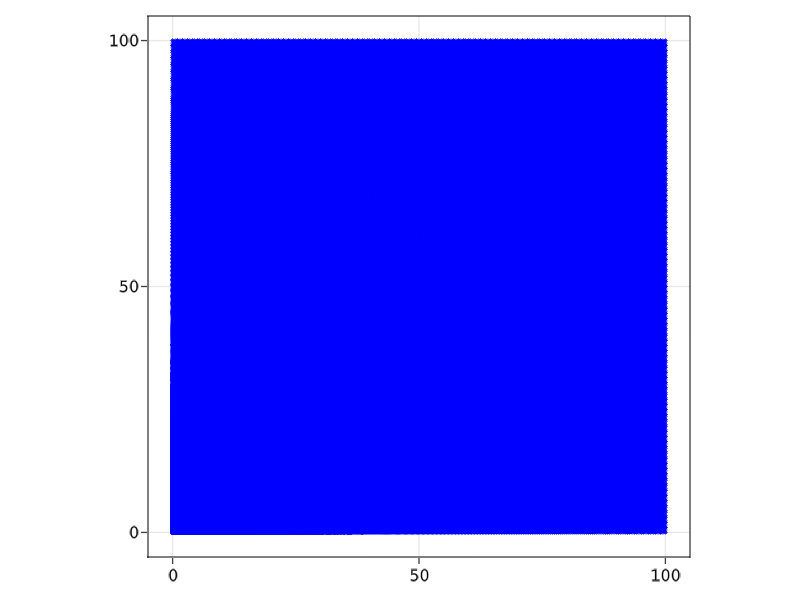

In [7]:
if Atom == false 
    fig, ax = plot(Ω1)
    ax.aspect = AxisAspect(1) # this makes the region with fixed aspect, so it might not give the correct ratios
    wireframe!(Ω1, color=:black, linewidth=1)
    scatter!(Ω1, marker=:star8, markersize=4, color=:blue)
    fig
end 

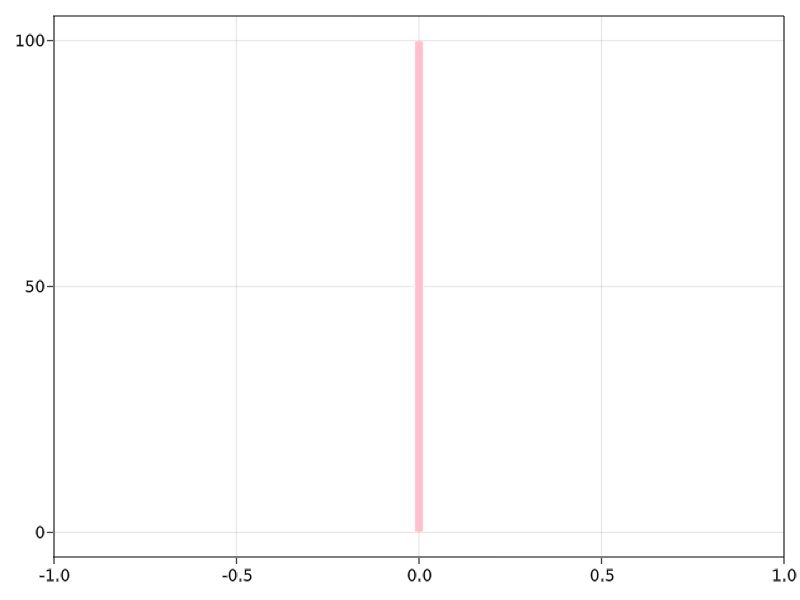

In [8]:
neumanntags_crho1= ["crho"]
Γ_crho1 = BoundaryTriangulation(model1,tags=neumanntags_crho1)
dΓ_crho1 = Measure(Γ_crho1,degree)
if Atom == false 
    fig = plot(Γ_crho1, linewidth=8
    #, shading=true
    )
end

In [9]:
neumanntags_cz1= ["cz"]
Γ_cz1 = BoundaryTriangulation(model1,tags=neumanntags_cz1)
dΓ_cz1 = Measure(Γ_cz1,degree)

Measure()

In [10]:
neumanntags_extrho1= ["extrho"]
Γ_extrho1 = BoundaryTriangulation(model1,tags=neumanntags_extrho1)
dΓ_extrho1 = Measure(Γ_extrho1,degree)

Measure()

In [11]:
neumanntags_extz1= ["extz"]
Γ_extz1 = BoundaryTriangulation(model1,tags=neumanntags_extz1)
dΓ_extz1 = Measure(Γ_extz1,degree)

Measure()

In [12]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)
V1 = TestFESpace(model1,reffe,conformity=:H1)
    #vector_type=Vector{Float64}
U1 = TrialFESpace(V1)

UnconstrainedFESpace()

In [15]:
a1(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ1 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho1 +   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz1  
b1(v) = ∫(-v * t* ρ) *dΩ1 + ∫( c * v *ρ ) *dΓ_crho1 + ∫( c * v *ρ ) *dΓ_cz1

b1 (generic function with 1 method)

In [19]:
op1 = AffineFEOperator(a1,b1,U1,V1)

AffineFEOperator()

In [21]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [22]:
uh1 = solve(solver,op1)

SingleFieldFEFunction():
 num_cells: 660496
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17601920194266925793

In [23]:
writevtk(Ω1,"resultados/Proyecto1/VACIO/f1",cellfields=["f"=>uh1])
writevtk(Ω1,"resultados/Proyecto1/VACIO/∇f1",cellfields=["∇f"=>∇(uh1)])

(["resultados/Proyecto1/VACIO/∇f1.vtu"],)

In [24]:
f11=conv∘(ρvec,∇(uh1))
f21=conv∘(zvec,∇(uh1))
F1=f21*f21 +f11*f11

OperationCellField():
 num_cells: 660496
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17601920194266925793

In [28]:
writevtk(Ω1,"resultados/Proyecto1/VACIO/residualf1",cellfields=["res"=>Δ(uh1)+invrho3 *f11+t])

(["resultados/Proyecto1/VACIO/residualf1.vtu"],)

### Factor conforme

In [40]:
res1(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F1 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ1 +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho1 +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz1+ ∫( c * w2 *ρ )  *dΓ_cz1 + ∫( c * w2 *ρ)  *dΓ_crho1

res1 (generic function with 1 method)

In [41]:
jac1(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F1 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ1 +∫( -w2 *( (dw- 1.) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho1 +   ∫( -w2 *( (dw -1. )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz1 

jac1 (generic function with 1 method)

In [42]:
oppsi1 = FEOperator(res1,jac1,U1,V1)

FEOperatorFromWeakForm()

In [43]:
using LineSearches: BackTracking
nls = NLSolver(
  show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-20, xtol= 1E-20)
solver = FESolver(nls)

NonlinearFESolver()

In [44]:
xcte(x) =1. # expresion
#w02=interpolate_everywhere(xcte,UD)
M=2.71E5
ue(x)=1. + 1/( (x[1]^2 + x[2]^2)^(1/2)+ϵ)#=)*(1+M*exp( -(x[1]^2 + x[2]^2)^2/(5E5)^4 ))=#
w021=interpolate_everywhere(ue,U1)

SingleFieldFEFunction():
 num_cells: 660496
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17601920194266925793

In [45]:
writevtk(Ω1,"resultados/Proyecto1/VACIO/seedFact1",cellfields=["ue"=>ue])

(["resultados/Proyecto1/VACIO/seedFact1.vtu"],)

In [46]:
w_1, = solve!(w021,solver,oppsi1)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     1.035202e+02              NaN
     1     1.945129e-02     1.000201e+12
     2     1.945129e-02     1.429810e-29
     3     1.945129e-02     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [47]:
 writevtk(Ω1,"resultados/Proyecto1/VACIO/Fact1",cellfields=["ψ"=>w_1])

(["resultados/Proyecto1/VACIO/Fact1.vtu"],)

In [49]:
writevtk(Ω1,"resultados/Proyecto1/VACIO/residualFact1",cellfields=["resi"=>Δ(w_1)+invrho* (ρvec ⋅ ∇(w_1)) ])

(["resultados/Proyecto1/VACIO/residualFact1.vtu"],)

### Si evitamos $\rho=0$ en el dominio


In [10]:
model2 = GmshDiscreteModel("modelos/rectangle_vacio.msh")

Info    : Reading 'modelos/rectangle_vacio.msh'...
Info    : 9 entities
Info    : 64933 nodes
Info    : 129864 elements
Info    : Done reading 'modelos/rectangle_vacio.msh'                       


UnstructuredDiscreteModel()

In [11]:
Ω2 = Triangulation(model2)
degree = 3
dΩ2 = Measure(Ω2,degree)

Measure()

In [12]:
writevtk(Ω2,"square")

(["square.vtu"],)

In [13]:
labels = get_face_labeling(model2)

Gridap.Geometry.FaceLabeling:
 0-faces: 64933
 1-faces: 193531
 2-faces: 128599
 tags: 5
 entities: 108

In [14]:
add_tag_from_tags!(labels,"centro",[ "centrorho"])

6-element Vector{String}:
 "centroz"
 "asintrho"
 "asintz"
 "centrorho"
 "surface"
 "centro"

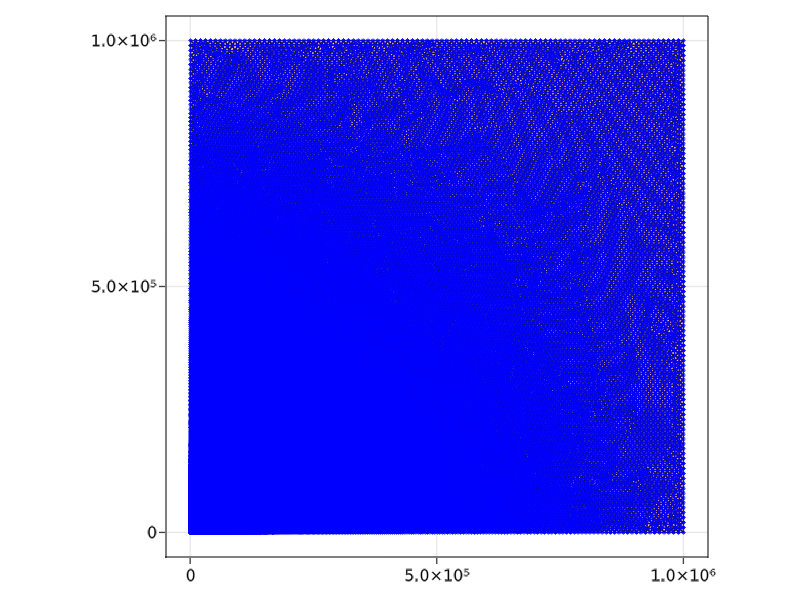

In [15]:
if Atom == false 
    fig, ax = plot(Ω2)
    ax.aspect = AxisAspect(1) # this makes the region with fixed aspect, so it might not give the correct ratios
    wireframe!(Ω2, color=:black, linewidth=1)
    scatter!(Ω2, marker=:star8, markersize=4, color=:blue)
    fig
end 

In [16]:
neumanntags_crho2= ["centrorho"]
Γ_crho2 = BoundaryTriangulation(model2,tags=neumanntags_crho2)
dΓ_crho2 = Measure(Γ_crho2,degree)

Measure()

In [17]:
neumanntags_cz2= ["centroz"]
Γ_cz2 = BoundaryTriangulation(model2,tags=neumanntags_cz2)
dΓ_cz2 = Measure(Γ_cz2,degree)

Measure()

In [18]:
neumanntags_extrho2= ["asintrho"]
Γ_extrho2 = BoundaryTriangulation(model2,tags=neumanntags_extrho2)
dΓ_extrho2 = Measure(Γ_extrho2,degree)

Measure()

In [19]:
neumanntags_extz2= ["asintz"]
Γ_extz2 = BoundaryTriangulation(model2,tags=neumanntags_extz2)
dΓ_extz2 = Measure(Γ_extz2,degree)

Measure()

In [20]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)
V2 = TestFESpace(model2,reffe,conformity=:H1)
    #vector_type=Vector{Float64}
U2 = TrialFESpace(V2)

UnconstrainedFESpace()

In [21]:
a2(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ2 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho2 +   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz2 
b2(v) = ∫(-v * t* ρ) *dΩ2 + ∫( c * v *ρ ) *dΓ_crho2 + ∫( c * v *ρ ) *dΓ_cz2

b2 (generic function with 1 method)

In [26]:
op2 = AffineFEOperator(a2,b2,U2,V2)

AffineFEOperator()

In [23]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [27]:
uh2 = solve(solver,op2)

SingleFieldFEFunction():
 num_cells: 128599
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12121824371863074782

In [28]:
writevtk(Ω2,"resultados/Proyecto1/VACIO/f2",cellfields=["f"=>uh2])
writevtk(Ω2,"resultados/Proyecto1/VACIO/∇f2",cellfields=["∇f"=>∇(uh2)])

(["resultados/Proyecto1/VACIO/∇f2.vtu"],)

In [29]:
f12=conv∘(ρvec,∇(uh2))
f22=conv∘(zvec,∇(uh2))
F2=f22*f22 +f12*f12

OperationCellField():
 num_cells: 128599
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12121824371863074782

In [30]:
writevtk(Ω2,"resultados/Proyecto1/VACIO/residualf1",cellfields=["res"=>Δ(uh2)+invrho3 *f12+t])

(["resultados/Proyecto1/VACIO/residualf1.vtu"],)

### Factor conforme

In [40]:
res2(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F2 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ2 +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho2 +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz2+ ∫( c * w2 *ρ )  *dΓ_cz2 + ∫( c * w2 *ρ)  *dΓ_crho2

res2 (generic function with 1 method)

In [41]:
jac2(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F2 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ2 +∫( -w2 *( (dw- 1.) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho2+   ∫( -w2 *( (dw -1. )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz2

jac2 (generic function with 1 method)

In [42]:
oppsi2 = FEOperator(res2,jac2,U2,V2)

FEOperatorFromWeakForm()

In [47]:
using LineSearches: BackTracking
nls = NLSolver(
  show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-20, xtol= 1E-20, iterations=50)
solver = FESolver(nls)

NonlinearFESolver()

In [55]:
xcte(x) =1. # expresion
#w02=interpolate_everywhere(xcte,UD)
M=2.71E5
ue(x)=1.# + 1/( (x[1]^2 + x[2]^2)^(1/2)+ϵ)#=)*(1+M*exp( -(x[1]^2 + x[2]^2)^2/(5E5)^4 ))=#
w022=interpolate_everywhere(ue,U2)

SingleFieldFEFunction():
 num_cells: 128599
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12121824371863074782

In [56]:
writevtk(Ω2,"resultados/Proyecto1/VACIO/seedFact1",cellfields=["ue"=>ue])

(["resultados/Proyecto1/VACIO/seedFact1.vtu"],)

In [57]:
w_2, = solve!(w022,solver,oppsi2)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     2.018420e-10              NaN
     1     2.018420e-10     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [60]:
 writevtk(Ω2,"resultados/Proyecto1/VACIO/Fact2",cellfields=["ψ"=>w_2])

(["resultados/Proyecto1/VACIO/Fact2.vtu"],)

InterruptException:
Stacktrace:
  [1] poptask(W::Base.InvasiveLinkedListSynchronized{Task})
    @ Base ./task.jl:862
  [2] wait()
    @ Base ./task.jl:871
  [3] wait(c::Base.GenericCondition{Base.Threads.SpinLock})
    @ Base ./condition.jl:123
  [4] _trywait(t::Timer)
    @ Base ./asyncevent.jl:130
  [5] wait
    @ ./asyncevent.jl:147 [inlined]
  [6] sleep(sec::Float64)
    @ Base ./asyncevent.jl:232
  [7] fps_renderloop(screen::GLMakie.Screen, framerate::Float64)
    @ GLMakie ~/.julia/packages/GLMakie/lcQNS/src/rendering.jl:32
  [8] renderloop(screen::GLMakie.Screen; framerate::Float64)
    @ GLMakie ~/.julia/packages/GLMakie/lcQNS/src/rendering.jl:48
  [9] renderloop(screen::GLMakie.Screen)
    @ GLMakie ~/.julia/packages/GLMakie/lcQNS/src/rendering.jl:41
 [10] (::GLMakie.var"#50#52"{GLMakie.Screen})()
    @ GLMakie ./task.jl:429


In [59]:
writevtk(Ω2,"resultados/Proyecto1/VACIO/residualFact2",cellfields=["resi"=>Δ(w_2)+invrho* (ρvec ⋅ ∇(w_2)) ])

(["resultados/Proyecto1/VACIO/residualFact2.vtu"],)